# Autoassociative Memory

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## p1, p2, p3

In [43]:
p1 = np.array([[-1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1]]).T
p2 = np.array([[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]).T
p3 = np.array([[1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1]]).T

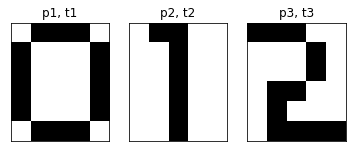

In [86]:
p_list = [p1, p2, p3]
cmap = mpl.colors.ListedColormap(['white', 'black'])

plt.figure(1)
for i in xrange(3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('p{}, t{}'.format(i+1, i+1))
    plt.imshow(np.reshape(p_list[i], (6, -1), order='F'), cmap=cmap)
plt.show()

## $$W = p_1p^T_1 + p_2p^T_2 + p_3p^T_3$$

In [54]:
W = np.matmul(p1, p1.T) + np.matmul(p2, p2.T) + np.matmul(p3, p3.T)

## Tests

In [81]:
#50% Occluded
occluded50_1 = np.array([[-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1]]).T
occluded50_2 = np.array([[-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]).T
occluded50_3 = np.array([[1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]).T
#67% Occluded
occluded67_1 = np.array([[-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1]]).T
occluded67_2 = np.array([[-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]).T
occluded67_3 = np.array([[1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]).T
#Noisy Patterns (7 pixels)
noisy_patterns1 = np.array([[-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,-1,1,-1,-1,1,-1,1,-1]]).T
noisy_patterns2 = np.array([[-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1]]).T
noisy_patterns3 = np.array([[-1,-1,-1,-1,-1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1]]).T

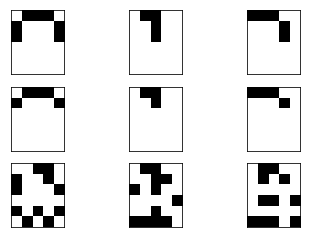

In [91]:
input_list = [occluded50_1, occluded50_2, occluded50_3, occluded67_1, occluded67_2, occluded67_3, noisy_patterns1, noisy_patterns2, noisy_patterns3]

plt.figure(1)
for i in xrange(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(input_list[i], (6, -1), order='F'), cmap=cmap)
plt.show()

## Symmetric hard limit transfer function

In [88]:
def hardlims(Wp):
    for i in xrange(len(Wp)):
        Wp[i][0] = -1 if Wp[i][0] < 0 else 1

## Result

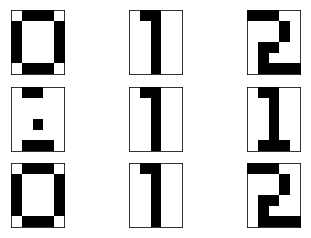

In [90]:
input_list = [occluded50_1, occluded50_2, occluded50_3, occluded67_1, occluded67_2, occluded67_3, noisy_patterns1, noisy_patterns2, noisy_patterns3]

plt.figure(1)
for i in xrange(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    
    #a = hardlims(Wp)
    Wp = np.matmul(W, input_list[i])
    hardlims(Wp)
    
    plt.imshow(np.reshape(Wp, (6, -1), order='F'), cmap=cmap)
plt.show()